<a href="https://colab.research.google.com/github/Koperek127/LeNetFashionMnistBinarized/blob/main/LeNetFashionMnistBinarized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install larq

from __future__ import absolute_import, division, print_function, unicode_literals
import larq as lq
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between -1 and 1
train_images, test_images = train_images / 127.5 - 1, test_images / 127.5 - 1

In [ ]:
kwargs = dict(input_quantizer="ste_sign",
              kernel_quantizer="ste_sign",
              kernel_constraint="weight_clip")


In [ ]:
modelLenet = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    #tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(modelLenet)
lq.models.summary(model)

+sequential stats---------------------------------------------------------------+
| Layer            Input prec.           Outputs  # 32-bit  Memory  32-bit MACs |
|                        (bit)                         x 1    (kB)              |
+-------------------------------------------------------------------------------+
| conv2d                     -   (-1, 28, 28, 6)       156    0.61       117600 |
| max_pooling2d              -   (-1, 14, 14, 6)         0       0            0 |
| conv2d_1                   -  (-1, 14, 14, 16)      2416    9.44       470400 |
| max_pooling2d_1            -    (-1, 7, 7, 16)         0       0            0 |
| flatten                    -         (-1, 784)         0       0            0 |
| dense                      -         (-1, 120)     94200  367.97        94080 |
| dense_1                    -          (-1, 84)     10164   39.70        10080 |
| dense_2                    -          (-1, 10)       850    3.32          840 |
+---------------

In [ ]:
modelLenet.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

trained_Lmodel = modelLenet.fit(train_images, train_labels, batch_size=64, epochs=10)

test_lossL, test_accL = modelLenet.evaluate(test_images, test_labels)

Epoch 1/10
938/938 [==============================] - 37s 39ms/step - loss: 0.6781 - accuracy: 0.7632
Epoch 2/10
938/938 [==============================] - 36s 38ms/step - loss: 0.3333 - accuracy: 0.8773
Epoch 3/10
938/938 [==============================] - 35s 37ms/step - loss: 0.2779 - accuracy: 0.8975
Epoch 4/10
938/938 [==============================] - 35s 38ms/step - loss: 0.2417 - accuracy: 0.9102
Epoch 5/10
938/938 [==============================] - 35s 37ms/step - loss: 0.2158 - accuracy: 0.9206
Epoch 6/10
938/938 [==============================] - 35s 38ms/step - loss: 0.2014 - accuracy: 0.9248
Epoch 7/10
938/938 [==============================] - 36s 39ms/step - loss: 0.1829 - accuracy: 0.9308
Epoch 8/10
938/938 [==============================] - 36s 38ms/step - loss: 0.1734 - accuracy: 0.9354
Epoch 9/10
938/938 [==============================] - 35s 38ms/step - loss: 0.1534 - accuracy: 0.9421
Epoch 10/10
313/313 [==============================] - 3s 9ms/step - loss: 0.2694 

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model = model.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/10
938/938 [==============================] - 37s 38ms/step - loss: 2.9189 - accuracy: 0.6781
Epoch 2/10
938/938 [==============================] - 36s 39ms/step - loss: 1.2721 - accuracy: 0.8170
Epoch 3/10
938/938 [==============================] - 36s 38ms/step - loss: 1.0697 - accuracy: 0.8336
Epoch 4/10
938/938 [==============================] - 36s 39ms/step - loss: 1.1249 - accuracy: 0.8345
Epoch 5/10
938/938 [==============================] - 36s 39ms/step - loss: 1.0389 - accuracy: 0.8482
Epoch 6/10
938/938 [==============================] - 37s 39ms/step - loss: 1.0570 - accuracy: 0.8469
Epoch 7/10
938/938 [==============================] - 36s 39ms/step - loss: 0.9862 - accuracy: 0.8551
Epoch 8/10
938/938 [==============================] - 37s 39ms/step - loss: 0.9443 - accuracy: 0.8612
Epoch 9/10
938/938 [==============================] - 36s 39ms/step - loss: 0.9063 - accuracy: 0.8676
Epoch 10/10
313/313 [==============================] - 3s 10ms/step - loss: 1.0512

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(20, use_bias=False, **kwargs),
    #tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model2)

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model2 = model2.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)

+sequential_2 stats----------------------------------------------------------------------------------------+
| Layer                  Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                              (bit)                        x 1       x 1    (kB)                          |
+----------------------------------------------------------------------------------------------------------+
| conv2d_4                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_4                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_5                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_5                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_3                        -         (-1, 784)        0         0       0           0            0 |
| dense_5          

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(40, use_bias=False, **kwargs),
    #tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model3)

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model3 = model3.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)

+sequential_4 stats----------------------------------------------------------------------------------------+
| Layer                  Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                              (bit)                        x 1       x 1    (kB)                          |
+----------------------------------------------------------------------------------------------------------+
| conv2d_8                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_8                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_9                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_9                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_7                        -         (-1, 784)        0         0       0           0            0 |
| dense_9          

In [ ]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(80, use_bias=False, **kwargs),
    #tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model4)

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model4 = model4.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss4, test_acc4 = model4.evaluate(test_images, test_labels)

+sequential_5 stats----------------------------------------------------------------------------------------+
| Layer                  Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                              (bit)                        x 1       x 1    (kB)                          |
+----------------------------------------------------------------------------------------------------------+
| conv2d_10                        -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_10                 -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_11                        -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_11                 -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_9                        -         (-1, 784)        0         0       0           0            0 |
| dense_11         

In [ ]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    #tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model5)

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model5 = model5.fit(train_images, train_labels, batch_size=16, epochs=10)

test_loss5, test_acc5 = model5.evaluate(test_images, test_labels)

+sequential_6 stats----------------------------------------------------------------------------------------+
| Layer                  Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                              (bit)                        x 1       x 1    (kB)                          |
+----------------------------------------------------------------------------------------------------------+
| conv2d_12                        -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_12                 -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_13                        -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_13                 -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_11                       -         (-1, 784)        0         0       0           0            0 |
| dense_13         

In [ ]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    #tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model6)

model6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model6 = model6.fit(train_images, train_labels, batch_size=8, epochs=10)

test_loss6, test_acc6 = model6.evaluate(test_images, test_labels)

+sequential_7 stats----------------------------------------------------------------------------------------+
| Layer                  Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                              (bit)                        x 1       x 1    (kB)                          |
+----------------------------------------------------------------------------------------------------------+
| conv2d_14                        -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_14                 -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_15                        -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_15                 -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_13                       -         (-1, 784)        0         0       0           0            0 |
| dense_15         

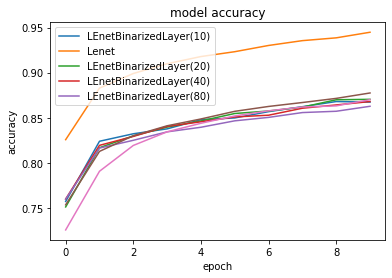

In [ ]:
# summarize history for accuracy
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_Lmodel.history['accuracy'])
plt.plot(trained_model2.history['accuracy'])
plt.plot(trained_model3.history['accuracy'])
plt.plot(trained_model4.history['accuracy'])
plt.plot(trained_model5.history['accuracy'])
plt.plot(trained_model6.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['LEnetBinarizedLayer(10)', 'Lenet','LEnetBinarizedLayer(20)','LEnetBinarizedLayer(40)','LEnetBinarizedLayer(80)'], loc='upper left')
plt.show()